In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
!unzip '/content/archive (5).zip'

Archive:  /content/archive (5).zip
  inflating: Housing.csv             


In [10]:
# Load data
df = pd.read_csv('Housing.csv')  # replace with actual path if needed

# Check for null values
print(df.isnull().sum())

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Simple regression: One independent variable
X_simple = df[['area']]
y = df['price']

# Multiple regression: Several independent variables
X_multiple = df.drop(['price'], axis=1)



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [11]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


In [13]:
X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
    return y_pred

In [17]:
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)
print("Simple Linear Regression:")
evaluate_model(lr_simple, X_test_simple, y_test_simple)

Simple Linear Regression:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


array([5024060.33139816, 5279498.23656143, 4232202.82539203,
       4640903.47365326, 4198144.43803692, 5373158.80178796,
       6139472.51727777, 4636646.17523387, 3891618.951841  ,
       3661724.83719406, 6165016.3077941 , 4187075.46214652,
       4095969.27597162, 3832016.77396957, 4202401.73645631,
       4057653.59019713, 3363713.94783691, 5066633.31559204,
       5002773.83930122, 5066633.31559204, 4649418.07049203,
       5417860.43519154, 4065742.45719396, 4130027.66332672,
       6024525.4599543 , 6752523.48966962, 3827759.47555018,
       3789443.78977569, 8131888.17755128, 3789443.78977569,
       4215173.63171447, 3840531.37080835, 5066633.31559204,
       5328457.16838439, 4545114.25921703, 4470611.53687774,
       4490195.10960693, 3866075.16132467, 3993794.11390631,
       3698763.33344273, 5909578.40263083, 4057653.59019713,
       5245439.84920633, 4300319.60010223, 5385930.69704613,
       5017674.38376908, 5066633.31559204, 4487640.7305553 ,
       5939379.49156655,

In [18]:
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)
print("\nMultiple Linear Regression:")
evaluate_model(lr_multi, X_test_multi, y_test_multi)


Multiple Linear Regression:
MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.32722559, 3294646.25725955, 3532275.09556558,
       5611774.56836476, 6368145.98732718, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847063, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612384, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.21395649,
       5886993.57919883, 2730836.19518458, 4727316.47323635,
       5244847.52716801, 7555324.21605603, 3220790.84680268,
       5191898.79934206, 8143726.91009786, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701508,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365835, 3983597.27861103, 3749338.70271056,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

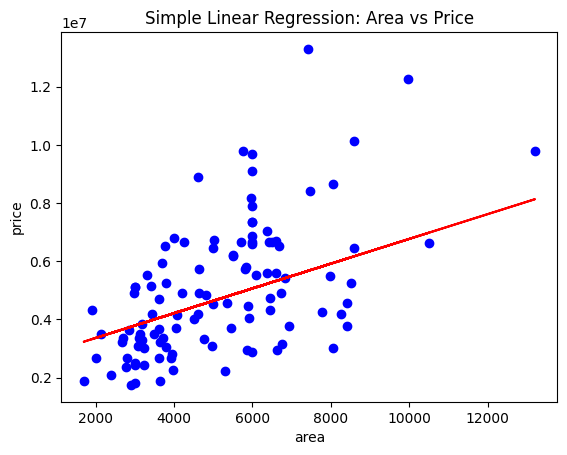

In [19]:
plt.scatter(X_test_simple, y_test_simple, color='blue')
plt.plot(X_test_simple, lr_simple.predict(X_test_simple), color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Simple Linear Regression: Area vs Price')
plt.show()

In [24]:
# Predict using the multiple linear regression
y_pred_multi = lr_multi.predict(X_test_multi)


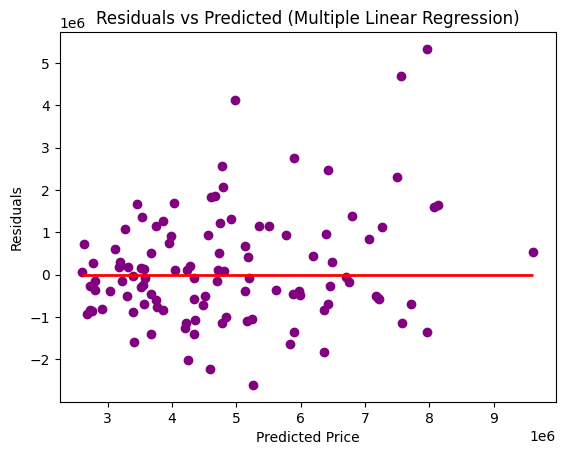

In [25]:
#Residuals
residuals = y_test_multi - y_pred_multi

#Plot
plt.scatter(y_pred_multi, residuals, color='purple')
plt.hlines(y=0, xmin=y_pred_multi.min(), xmax=y_pred_multi.max(), color='red', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Multiple Linear Regression)')
plt.show()
